# prisoners-dilemma-cellular-automata
A Python project that explores the dynamics of cooperation and competition through the lens of game theory. By transforming **cellular automata into strategies** and employing classic tactics like **Tit For Tat,** the project investigates the performance of various strategies in the context of the **Prisoner's Dilemma.**

[**Webpage**](https://dafmontenegro.com/prisoners-dilemma-cellular-automata/) | [**Repository**](https://github.com/dafmontenegro/prisoners-dilemma-cellular-automata) | [**Python Notebook**](https://github.com/dafmontenegro/prisoners-dilemma-cellular-automata/blob/master/prisoners_dilemma_cellular_automata.ipynb)

Aquí está la tabla de contenidos sin los enlaces:

- 1. Theoretical Background
  - 1.1 Prisoner’s Dilemma
  - 1.2 Tit For Tat Strategy
  - 1.3 Cellular Automata
- 2. Implementation and Simulation
  - 2.1 The 256 Rules as a Strategy
    - 2.1.1 x8 Game Example:
    - 2.1.2 x64 Game Example:
  - 2.2 The Anti-Automata
  - 2.3 Tit For Tat Rule
- 3. Code
  - 3.1 Python Libraries and System Configuration
  - 3.2 class Rule
  - 3.3 class TitForTat(Rule)
  - 3.4 class PrisonersDilemma
- 4. Performance Metrics and Analysis
  - 4.1 Perfect Score Percentage
  - 4.2 Cumulative Score Percentage
  - 4.3 Performance in 100-move games x64
  - 4.4 Tit For Tat performance vs best rule x64
  - 4.5 Performance in 100-move games x8
  - 4.6 Tit For Tat performance vs best rule x8
- 5. Synthesis and Final Thoughts
- 6. Contributions
- 7. References

## 1. Theoretical Background

### 1.1 Prisoner’s Dilemma
Perhaps this is the most famous problem in game theory, which is fundamentally based on cooperation and where two subjects face the same dilemma of whether to cooperate or not, with the only certainty being that their subsequent reward or outcome will be closely related to the decision made by the other. This problem has different versions; however, for this project, we will use the **Symmetric 2×2 PD With Ordinal Payoffs** (explained in greater depth in the **Stanford Encyclopedia of Philosophy [2]**) as exemplified in the table below:

|               | cooperate | defect |
| :-----------: | :-------: | :----: |
| **cooperate** |   B, B    |  D, A  |
|   **defect**  |   A, D    |  C, C  |

Always satisfying: **A>B>C>D**. For this project, the equivalences used were as follows: **A=5, B=3, C=1, D=0.** The resulting table is shown below:

|               | cooperate | defect |
| :-----------: | :-------: | :----: |
| **cooperate** |   3, 3    |  0, 5  |
|   **defect**  |   5, 0    |  1, 1  |

If you're interested in learning more, I recommend watching the video titled ["What Game Theory Reveals About Life, The Universe, and Everything" by Veritasium,](https://youtu.be/mScpHTIi-kM?si=4yu0qFeFhT4j2h1S) which inspired this project, as well as the educational game created by [Nicky Case, "The Evolution of Trust",](https://ncase.me/trust/) which was a huge inspiration for the aforementioned video.

### 1.2 Tit For Tat Strategy
This was the strategy submitted by **Anatol Rapoport** to participate in the competition held by **Robert Axelrod** in **1980** [3]. Tit For Tat not only won the competition but also demonstrated ***the importance of cooperation,*** as any rational first glance at the prisoner's dilemma will always suggest that the best strategy is not to cooperate.<br>
I must confess that this is ***my favorite strategy,*** which is why I decided to have it play against the 256 **8-bit cellular automata.** But before we proceed, let's understand a little about how it works:

Tit For Tat relies on **two very simple rules** as its principle.
1. **Start by cooperating** as a gesture of goodwill toward the other.
2. **Mirror the opponent's last move,** regardless of whether they cooperated or not.

> Robert Axelrod identified **four success qualities** that contributed to the effectiveness of strategies [3]:
> 1. **Nice:** Have good will and do not take advantage of your opponent.
> 2. **Forgiving:** Cooperate when necessary, even if you've been let down before.
> 3. **Retaliatory:** If your opponent defects, strike back immediately. Don't be a pushover
> 4. **Clear:** Be consistent with your strategy and actions.

### 1.3 Cellular Automata
To explain this in the best way, we will make use of the definition provided by **Wolfram Research** regarding one-dimensional cellular automata, which, to specify the state of a cell in the next generation, utilizes the current state of the cell and its immediate neighbors (one to its left and one to its right):

> The simplest class of **one-dimensional cellular automata.** Elementary cellular automata have two possible values for each cell **(0 or 1)**, and rules that depend only on nearest neighbor values. As a result, the evolution of an elementary cellular automaton can completely be described by a table specifying the state a given cell will have in the next generation based on the value of the cell to its left, the value the cell itself, and the value of the cell to its right. Since there are **2×2×2=2^3=8 possible binary states** for the three cells neighboring a given cell, there are a total of **2^8=256 elementary cellular automata**, each of which can be indexed with an 8-bit binary number **(Wolfram 1983, 2002).**[1]

## 2. Implementation and Simulation



### 2.1 The 256 Rules as a Strategy
A rule is essentially an **8-bit binary number** corresponding to all possible responses to a 3-bit binary number. In other words, given one of the 8 possible inputs **(binary numbers between 0 and 7)**, the result will be either 0 or 1, which in the context of the project means to cooperate or not to cooperate.

To illustrate a rule, let's arbitrarily choose **rule 12** and **rule 21**:

|             |  111  |  110  |  101  |  100  |  011  |  010  |  001  |  000  |
| :---------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **rule 12** |   0   |   0   |   0   |   0   |   1   |   1   |   0   |   0   |
| **rule 21** |   0   |   0   |   0   |   1   |   0   |   1   |   0   |   1   |

For rules to compete against each other, it's necessary that they have at least 3 bits as a starting point, which in the project we call ***preloads,*** and this defines the types of games created **(x8 and x64)**. The x8 game mode corresponds to both rules starting the game with the *same preload*, while the x64 mode allows them to start with different preloads, resulting in **8^2 = 64 pairings**. Let's see both examples below:


#### 2.1.1 x8 Game Example:

| 10-moves game |    010    |    101    |    010    |    101    |    010    |    101    |    010    |    101    |    010    |    101    |        |
|  :---------:  | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :----: |
|  **rule 12**  |     1     |     0     |     1     |     0     |     1     |     0     |     1     |     0     |     1     |     0     |   20   |
|  **rule 21**  |     1     |     0     |     1     |     0     |     1     |     0     |     1     |     0     |     1     |     0     |   20   |
|               |  **010**  |  **101**  |  **010**  |  **101**  |  **010**  |  **101**  |  **010**  |  **101**  |  **010**  |  **101**  |        |

> Game of 10 moves, same preload, x8 mode. A complete x8 game involves repeating the same process, but with all 8 possible binary states as preload.


#### 2.1.2 x64 Game Example:

| 10-moves game |    101    |    011    |    110    |    100    |    000    |    000    |    001    |    010    |    100    |    000    |        |
|  :---------:  | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :-------: | :----: |
|  **rule 12**  |     1     |     0     |     0     |     0     |     0     |     1     |     0     |     0     |     0     |     1     |   29   |
|  **rule 21**  |     0     |     0     |     0     |     1     |     1     |     1     |     0     |     1     |     1     |     1     |   14   |
|               |  **010**  |  **100**  |  **000**  |  **000**  |  **001**  |  **011**  |  **111**  |  **110**  |  **101**  |  **011**  |        |

> Game of 10 moves, different preloads, x64 mode. A complete x64 game involves repeating the same process, but with all possible 64 pairings of binary states as preloads.

### 2.2 The Anti-Automata

When I thought about putting the 256 automatons to compete, the idea of ​​creating a strategy called the anti-automata occurred to me, **capable of recognizing the opponent's strategy** in a series of movements **(to which specific rule it faces)** and subsequently, with this information, knowing the opponent's next move and defeating it.

I theorized that with the correct sequence of initial outputs, the anti-automata could in 8 moves determine all the binary states of the opponent. For example, starting from the preload **000,** it's possible to generate the sequence **1110100** to obtain the binary states in the order **01376524**, or also the sequence **1011100** to obtain the responses of **01253764**; this idea could be extended to all binary states and possible pairings, but ultimately, *it's a futile concept.* Let's see why:

|               | cooperate | defect |               |
| :-----------: | :-------: | :----: | :-----------: |
| **cooperate** |     3     |    0   |   3 + 0 = 3   |
|  **defect**   |     5     |    1   |   5 + 1 = 6   |

There are two possible responses from our opponent regardless of what we do, these are to cooperate or not to cooperate. Assuming that our criterion for making the best decision per turn is **to gain the highest number of points,** then we will discover that **not cooperating is always the only response in this strategy.** *Notice that in the table above, the row with the most points is the defect.*

> In the table, the largest sum of cells would be **3 + 5 = 8**. However, this strategy could not be considered feasible, as both cells are mutually exclusive; that's why **5 + 1 = 6** is the strategy that would yield the most points.

All this means that the 8 bits of the anti-automaton **are all 0** and that it corresponds to rule 0 **(the most selfish rule)**.

|                            |  111  |  110  |  101  |  100  |  011  |  010  |  001  |  000  |
| :------------------------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **rule 0 (anti-automata)** |   0   |   0   |   0   |   0   |   0   |   0   |   0   |   0   |


### 2.3 Tit For Tat Rule

For the creation of the Tit For Tat as a rule, a new class was created that inherits from the Rule class. Essentially, **Tit For Tat is rule 70**, as it corresponds to cooperating in all binary states that end in one.

|                           |  111  |  110  |  101  |  100  |  011  |  010  |  001  |  000  |
| :-----------------------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **rule 70 (Tit For Tat)** |   1   |   0   |   1   |   0   |   1   |   0   |   1   |   0   |

> As mentioned before, Tit For Tat always starts by cooperating, so it can only begin with the binary states it recognizes as cooperation: **111, 101, 011, 001.** In other words, the x8 game mode in Tit For Tat is equivalent to playing with only four rules or x4. In a very similar way, the x64 mode actually corresponds to the x32 mode, which pairs the four aforementioned binary states with the eight possible states of the opponent.

## 3. Code


### 3.1 Python Libraries and System Configuration

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Union

sys.setrecursionlimit(1234567)

### 3.2 class Rule

In [2]:
class Rule:

    def __init__(self, number: int):
        self.scores: List[float] = []
        self.number: int = number
        self.cellular_automata: str = f"{self.number:08b}"
        self.binary_states: Dict[str, str] = {f"{7-i:03b}": self.cellular_automata[i] for i in range(8)}

    def strategy(self, opponent: str) -> str:
        return self.binary_states[opponent]

    def vs(self, rule: "Rule", my_preload: str, op_preload: str, moves: int, my_score: int = 0, op_score: int = 0) -> Tuple[int, int]:
        my_strategy: str = self.strategy(op_preload)
        op_strategy: str = rule.strategy(my_preload)
        if my_strategy == "1" == op_strategy:
            my_score += 3
            op_score += 3
        elif my_strategy == "1" and op_strategy == "0":
            op_score += 5
        elif my_strategy == "0" and op_strategy == "1":
            my_score += 5
        elif my_strategy == "0" == op_strategy:
            my_score += 1
            op_score += 1
        if moves < 2:
            return my_score, op_score
        else:
            return self.vs(rule, my_preload[1:] + my_strategy, op_preload[1:] + op_strategy, moves - 1, my_score, op_score)

    def gamex8(self, rule: "Rule", moves: int) -> None:
        if self == rule:
            rule = Rule(self.number)
        for binary_state in self.binary_states:
            my_score, op_score = self.vs(rule, binary_state, binary_state, moves)
            self.scores.append(my_score / (moves * 5))
            rule.scores.append(op_score / (moves * 5))

    def gamex64(self, rule: "Rule", moves: int) -> None:
        if self == rule:
            rule = Rule(self.number)
        for my_binary_state in self.binary_states:
            for op_binary_state in self.binary_states:
                my_score, op_score = self.vs(rule, my_binary_state, op_binary_state, moves)
                self.scores.append(my_score / (moves * 5))
                rule.scores.append(op_score / (moves * 5))

    def perfect_score_percentage(self) -> float:
        return sum(self.scores) / len(self.scores)

    def cumulative_score_percentage(self) -> np.ndarray:
        return np.cumsum(np.array(self.scores) / len(self.scores))

### 3.3 class TitForTat(Rule)

In [3]:
class TitForTat(Rule):

    def __init__(self):
        super().__init__(170)
        self.cooperation: List[str] = ["111", "101", "011", "001"]
        self.number: str = "Tit For Tat"

    def gamex4(self, rule: "Rule", moves: int) -> None:
        if self == rule:
            rule = TitForTat()
        for binary_state in self.cooperation:
            my_score, op_score = self.vs(rule, binary_state, binary_state, moves)
            self.scores.append(my_score / (moves * 5))
            rule.scores.append(op_score / (moves * 5))

    def gamex8(self, rule: "Rule", moves: int) -> None:
        self.gamex4(rule, moves)

    def gamex32(self, rule: "Rule", moves: int) -> None:
        if self == rule:
            rule = TitForTat()
        op_binary_states = self.binary_states
        if isinstance(rule, TitForTat):
            op_binary_states = self.cooperation
        for my_binary_state in self.cooperation:
            for op_binary_state in op_binary_states:
                my_score, op_score = self.vs(rule, my_binary_state, op_binary_state, moves)
                self.scores.append(my_score / (moves * 5))
                rule.scores.append(op_score / (moves * 5))

    def gamex64(self, rule: "Rule", moves: int) -> None:
        self.gamex32(rule, moves)

### 3.4 class PrisonersDilemma

In [4]:
class PrisonersDilemma:

    def __init__(self, moves: int, binary_states: str = "x64", rule_numbers: List[int] = list(range(256))):
        self.moves: int = moves
        self.benchmark: Dict[int, Dict[str, Union[int, str]]] = {}
        self.positions_table: List[Tuple[int, float]] = []
        self.set_rules(rule_numbers)
        self.binary_states: str = binary_states

    def set_rules(self, rule_numbers: List[int]) -> None:
        self.rules: Dict[int, Rule] = {}
        for rule_number in rule_numbers:
            self.rules[rule_number] = Rule(rule_number)

    def compete(self) -> None:
        contenders = list(self.rules.keys())
        for rule in self.rules.values():
            for contender in contenders:
                if self.binary_states == "x64":
                    rule.gamex64(self.rules[contender], self.moves)
                elif self.binary_states == "x8":
                    rule.gamex8(self.rules[contender], self.moves)
            contenders = contenders[1:]
        self.classify()

    def classify(self) -> None:
        perfect_scores_percentage = [(rule.number, rule.perfect_score_percentage()) for rule in self.rules.values()]
        self.positions_table = sorted(perfect_scores_percentage, key=lambda rule_tuple: rule_tuple[1], reverse=True)

    def tit_for_tat(self, rule_number: int) -> None:
        self.rules = {rule_number: Rule(
            rule_number), "Tit For Tat": TitForTat()}
        if self.binary_states == "x64":
            self.rules["Tit For Tat"].gamex64(self.rules[rule_number], self.moves)
        elif self.binary_states == "x8":
            self.rules["Tit For Tat"].gamex8(self.rules[rule_number], self.moves)
        self.classify()
        self.show([self.best(), self.worst()])
        del self.rules[self.worst()]
        self.show([self.best()], ["Winner: "], ["blue"])

    def best(self) -> int:
        return self.positions_table[0][0]

    def worst(self) -> int:
        return self.positions_table[-1][0]

    def remove_half(self) -> None:
        half = int(len(self.positions_table) / 2)
        best_half = self.positions_table[:half]
        self.set_rules([rule_tuple[0] for rule_tuple in best_half])

    def performance(self) -> Dict[int, Dict[str, Union[int, str]]]:
        self.benchmark = {}
        classifications = int(math.log2(len(self.rules)))
        for i in range(classifications, -1, -1):
            self.compete()
            best = self.best()
            worst = self.worst()
            if len(self.rules) > 1:
                self.show([best, worst])
                self.benchmark[2**i] = {"best": best, "worst": worst}
            else:
                self.show([best], ["Winner: "], ["blue"])
                self.benchmark[2**i] = {"best": best}
            self.remove_half()
        return self.benchmark

    def show(self, rule_numbers: List[int], text: List[str] = ["Best: ", "Worst: "], colors: List[str] = ["lime", "tomato"]) -> None:
        for i, rule_number in enumerate(rule_numbers):
            len_rules = len(self.rules)
            psp = self.rules[rule_number].perfect_score_percentage()
            csp = self.rules[rule_number].cumulative_score_percentage()
            plt.plot(csp, label=f"{text[i]}Rule {rule_number} (psp: {psp:.4f})", color=colors[i])
            plt.title(f"Performance in {self.moves}-move games {self.binary_states} ({len_rules} rules)")
            plt.xlabel("number of games")
            plt.ylabel("cumulative perfect score percentage")
            plt.legend()
        plt.show()

## 4. Performance Metrics and Analysis

All the simulations shown below are performed with `moves = 100`, which means that each game with a default preload has 100 moves, and for each game, a **Perfect Score Percentage** is calculated, which is stored in `Rules.scores`. So, for example, if there are 256 rules competing in x64 mode, each one will have a vector of length **256 * 64 = 16384** (this is because they compete against all rules, even against themselves).

In [5]:
moves = 100

### 4.1 Perfect Score Percentage
The Perfect Score Percentage can be calculated in **two ways**. The first is through confrontation and is based on dividing the score obtained by the hypothetical maximum possible score. Assuming a confrontation has **100 moves**, the maximum score would be **500**, which corresponds to **5*100**, because 5 is the maximum score that can be obtained in a move (where one does not cooperate and the opponent does). So, using the example tables above, specifically those in section **2.1.2,** the Perfect Score Percentage according to the rules would be as follows:

|             |   score   |  p.s.p vs |
| :---------: |   :---:   |   :---:   |
| **rule 12** |    29     |   0,58    |
| **rule 21** |    14     |   0,28    |

The second way corresponds to the **Perfect Score Percentage of a rule**, that is, to the Rule class's Perfect Score Percentage. This is calculated from `Rule.scores`, which is an array containing the Perfect Score Percentages of all encounters corresponding to that rule. The calculation consists of `Rule.scores / len(Rule.scores)` since for it to be **1**, the rule must have had a perfect score in all its encounters. An example follows:

|   scores   |   1   |   2   |   3   | p.s.p rule |
| :--------: | :---: | :---: | :---: | :--------: |
| **rule 9** | 0,12  | 0,21  | 0,30  |    0,21    |

### 4.2 Cumulative Score Percentage
The Cumulative Score Percentage is an array with the **cumulative sum of the Perfect Score Percentage**, which is calculated from `Rule.scores`, where it returns an array of the same length.

|            |   1   |   2   |   3   |
| :--------: | :---: | :---: | :---: |
| **rule 9** | 0,12  | 0,21  | 0,30  |
|  **c.s.p** | 0,12  | 0,33  | 0,63  |

### 4.3 Performance in 100-move games x64

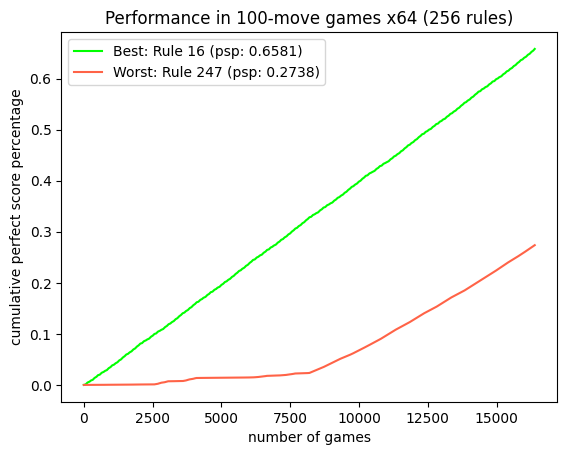

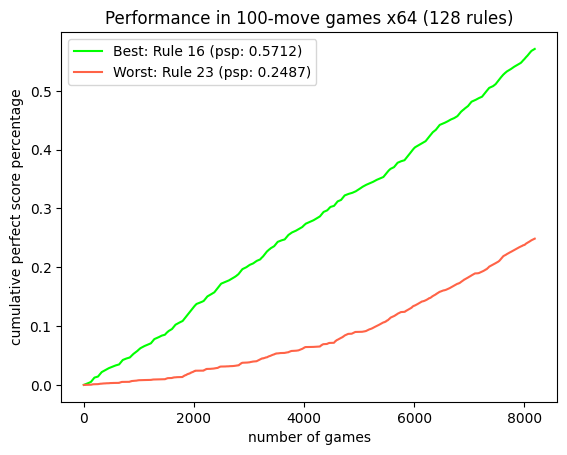

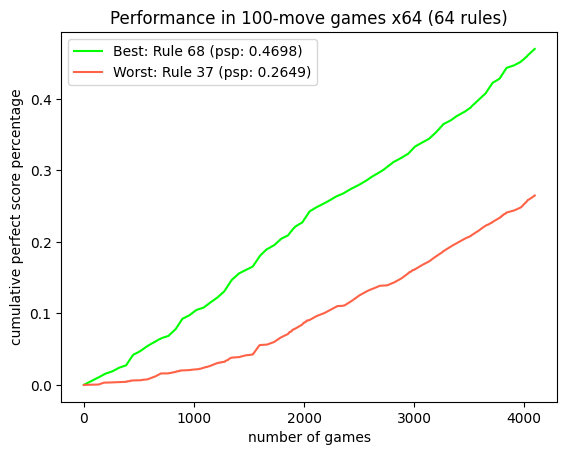

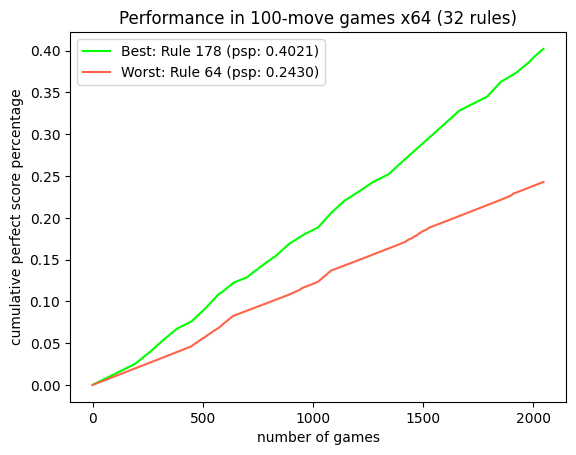

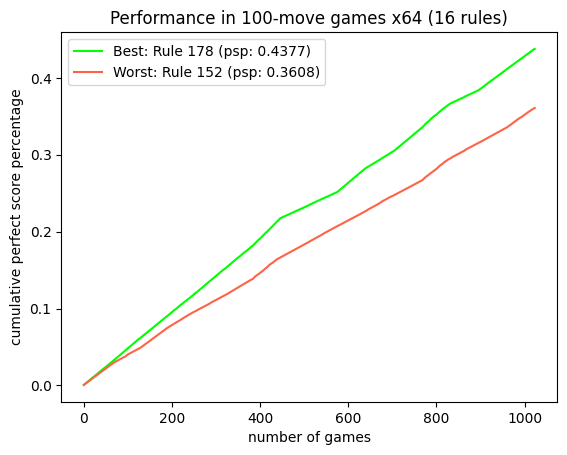

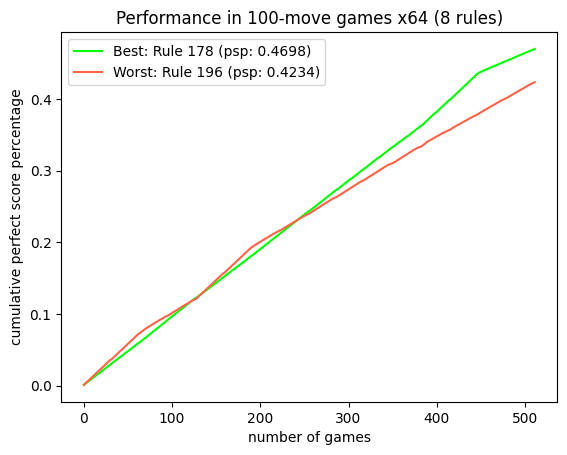

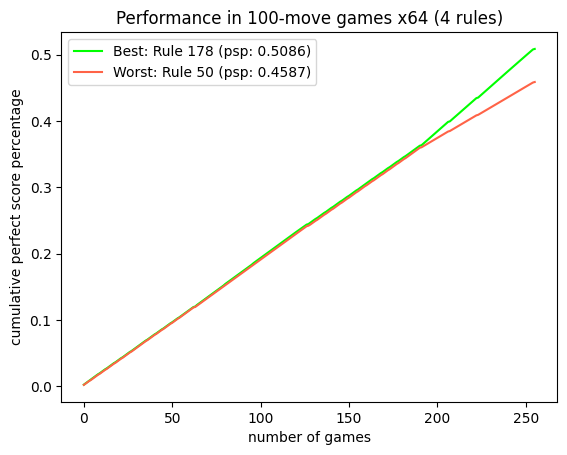

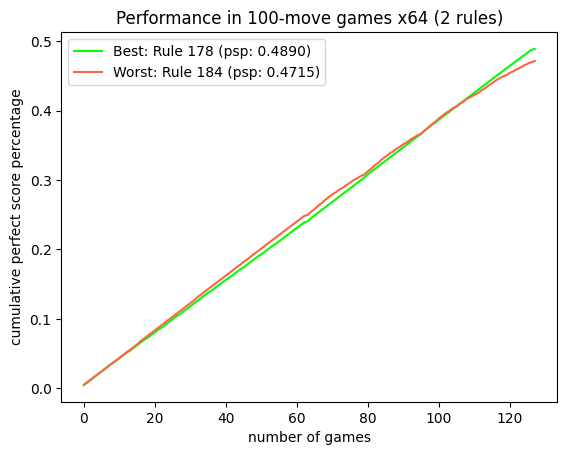

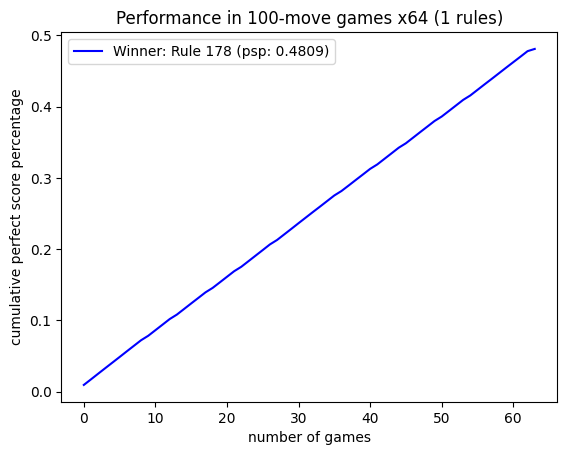

In [6]:
prisoners_dilemmax64 = PrisonersDilemma(moves, "x64")
performancex64 = prisoners_dilemmax64.performance()

### 4.4 Tit For Tat performance vs best rule x64

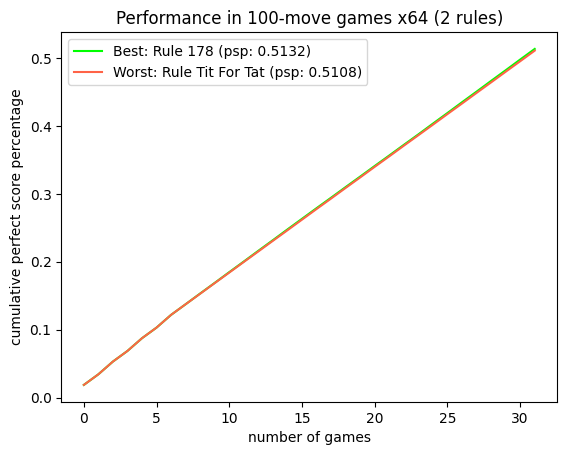

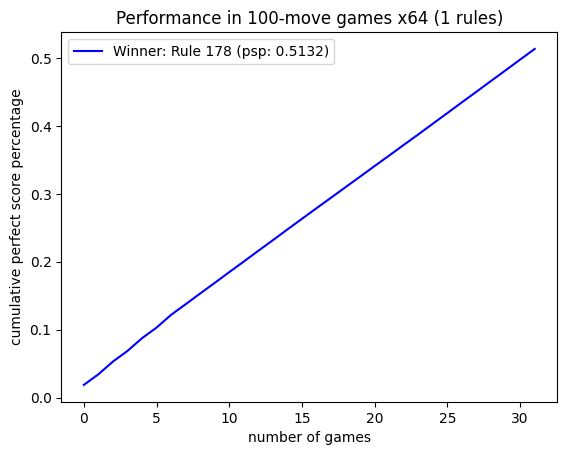

In [7]:
prisoners_dilemmax64.tit_for_tat(performancex64[1]["best"])

### 4.5 Performance in 100-move games x8

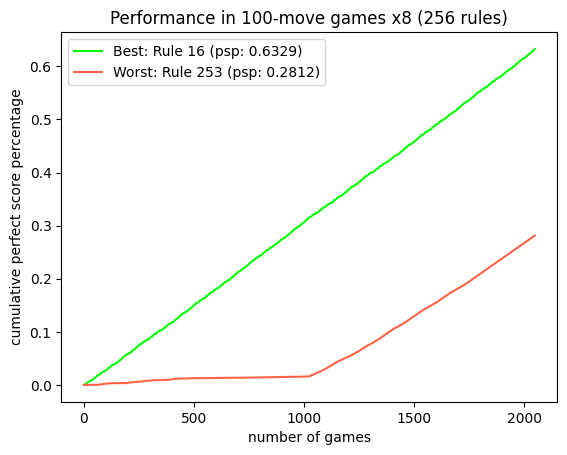

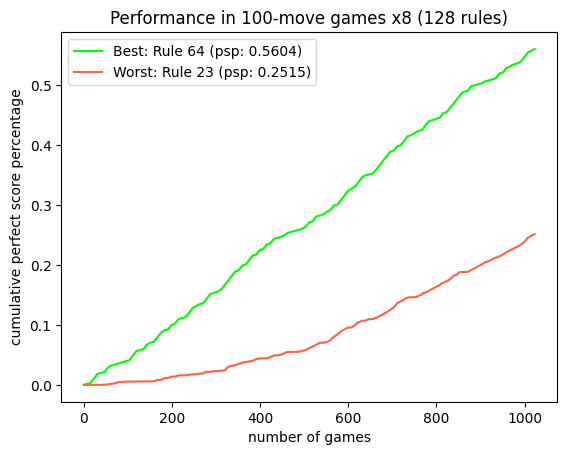

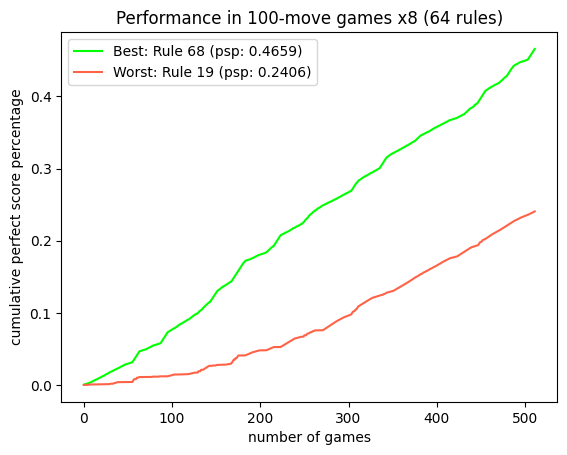

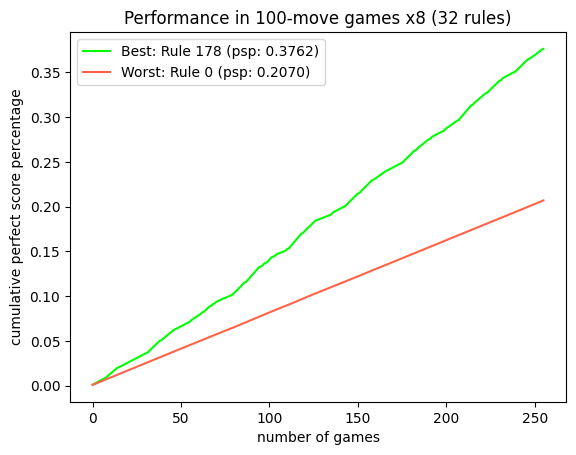

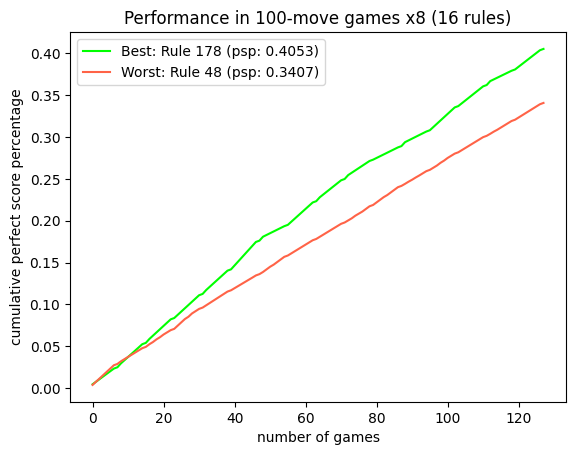

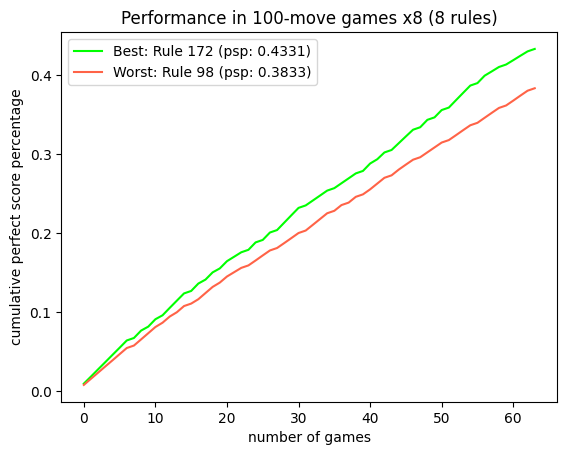

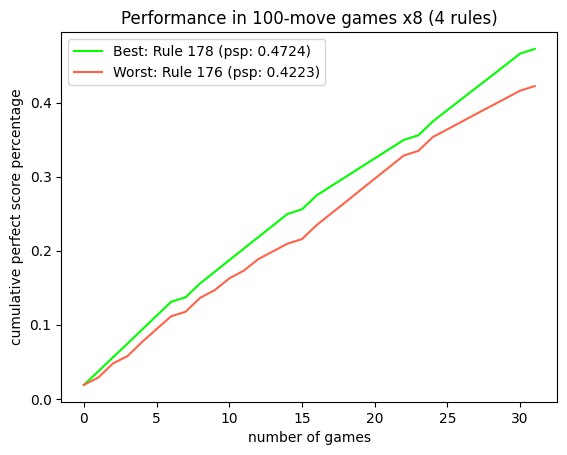

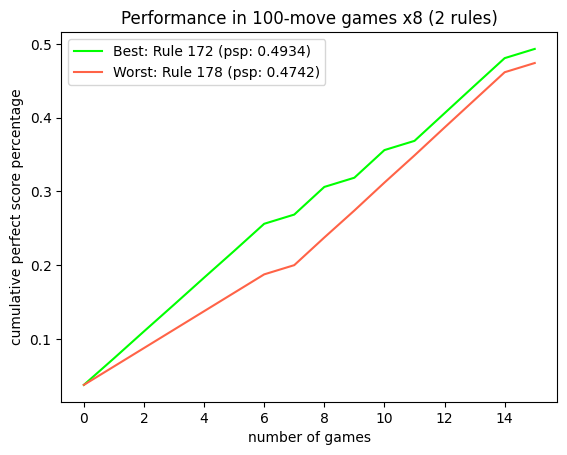

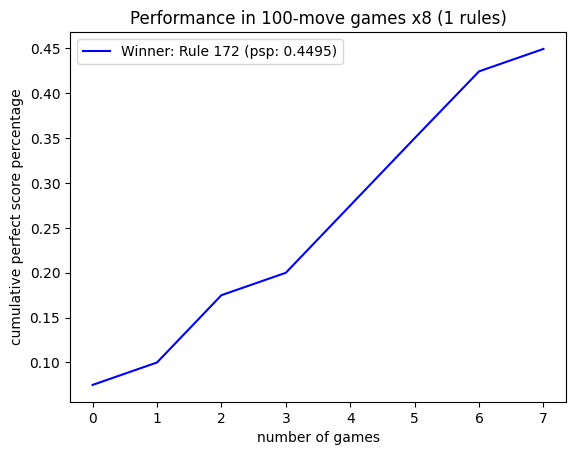

In [8]:
prisoners_dilemmax8 = PrisonersDilemma(moves, "x8")
performancex8 = prisoners_dilemmax8.performance()

### 4.6 Tit For Tat performance vs best rule x8

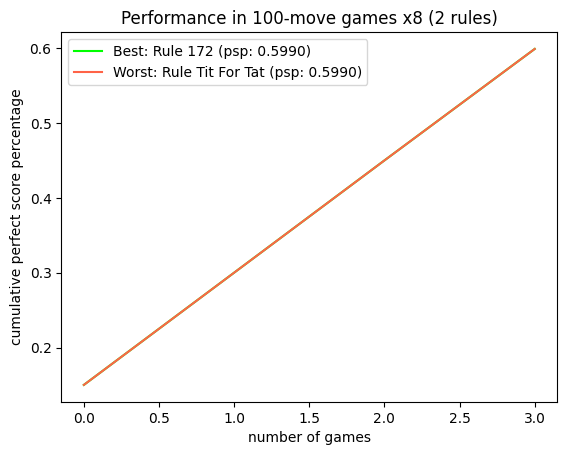

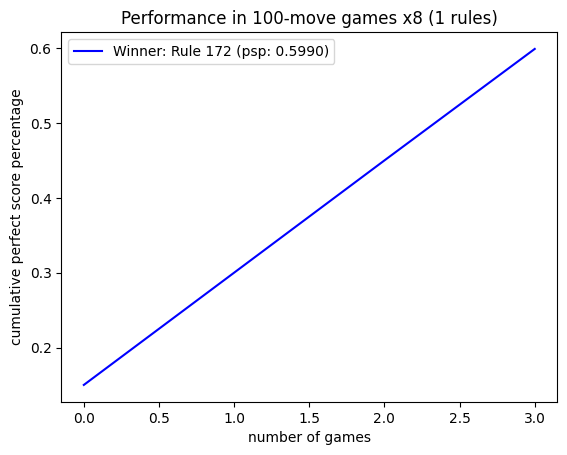

In [9]:
prisoners_dilemmax8.tit_for_tat(performancex8[1]["best"])

## 5. Synthesis and Final Thoughts

I firmly stand by the belief that **Tit For Tat is the best strategy**, not only because in essence Tit For Tat is not a cellular automata (so it is natural to note that competition goes both ways without any guarantee), but also because ***I love Tit For Tat as a philosophy of life***.

What motivated me to do this project were not only the **four success qualities** developed by Robert Axelrod in his research, but also the fascinating conclusion of how ***cooperation can be, in some contexts, the most important differentiator;*** not to mention that the most successful strategies were not those that sought to take advantage of their opponent, but those that **understood that mutual benefit can always take us further.** An example of this in this project is **the anti-automata which performed terribly in all tests** even though it was supposed to have the winning strategy.

So, beyond this simulation, ***I love to keep the idea that where we all win, we also win ourselves***, and not as popularly believed that in order to win, the other must lose. **Cooperation is one of the things that I am most passionate about studying in life,** so thank you for reading about this small project, and don't hesitate that in the future we will be able to cooperate together **not only to achieve a common good, but to achieve a general good.**



## 6. Contributions
**Contributions to prisoners-dilemma-cellular-automata are welcome** from researchers, developers, and enthusiasts interested in game theory, computational modeling, and strategic analysis. Collaborative efforts to expand the project's scope, refine simulation methodologies, and interpret results are **encouraged and appreciated.**

## 7. References
[1] **Wolfram Research, Inc. (s. f.). Elementary Cellular Automaton -- from Wolfram MathWorld.** https://mathworld.wolfram.com/ElementaryCellularAutomaton.html

[2] **Prisoner’s Dilemma (Stanford Encyclopedia of Philosophy). (2019, 2 abril).** https://plato.stanford.edu/entries/prisoner-dilemma/

[3] **Veritasium. (2023, 23 diciembre). What Game Theory Reveals About Life, The Universe, and Everything [Vídeo]. YouTube.** https://www.youtube.com/watch?v=mScpHTIi-kM